In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4##Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
pd.read_csv('../data/gdp_percapita.csv')

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [4]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

In [5]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


### 5 How many rows and columns are in gdp_df? What are the data types of each column?

## Answer: 7662 Rows, 4 Columns, some countries have data starting at a later date

In [9]:
gdp_df.info

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]>

In [10]:
gdp_df.shape

(7662, 4)

In [11]:
gdp_df.shape[0]

7662

In [12]:
gdp_df.shape[1]

4

## 6 Drop the Value Footnotes column THEN rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.



In [14]:
gdp_df=gdp_df.drop(["Value Footnotes"], axis=1)

In [15]:
gdp_df=gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

THIS WORKS TOO!! ##gdp_df.drop(columns=['Value Footnotes'])

## 7 How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?


## Answer: 202 have data for all 33 years. 40 are missing years. 

In [18]:
gdp_df['Year'].nunique()

33

In [19]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [20]:
gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [21]:
countries=gdp_df.groupby('Country')['Year'].count().sort_values().reset_index()

In [22]:
countries

,Country,Year
0,Djibouti,10
1,Somalia,10
2,Turks and Caicos Islands,12
3,Sint Maarten (Dutch part),14
4,Kosovo,15
...,...,...
237,Jamaica,33
238,Japan,33
239,Jordan,33
240,IDA total,33


In [23]:
countries[countries['Year']<33].count()

Country    40
Year       40
dtype: int64

In [24]:
countries[countries['Year']==33].count()

Country    202
Year       202
dtype: int64

## 8 In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


## Answer: Some dont have enough information to truly decipher. A boxplot is best because it summarizes the distribution of a numeric variable for one or several groups. It allows to quickly get the median, quartiles and outliers but also hides the dataset individual data points.

In [26]:
year_2020=gdp_df[gdp_df['Year']==2020]

In [27]:
year_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


Text(0.5, 1.0, 'Displot')

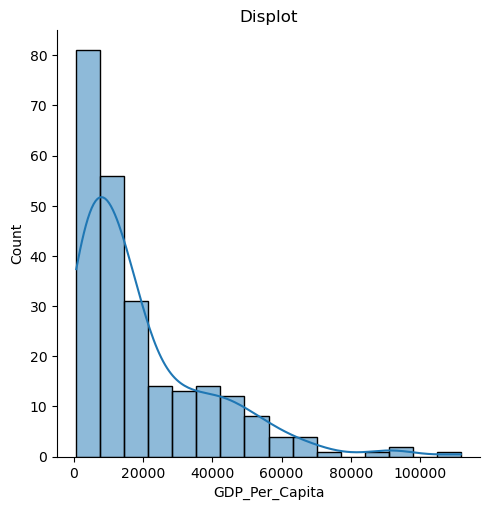

In [28]:
sns.displot(data=year_2020["GDP_Per_Capita"], kde=True)
plt.ylabel('Count')
plt.title('Displot')

Text(0.5, 1.0, 'KDE Plot')

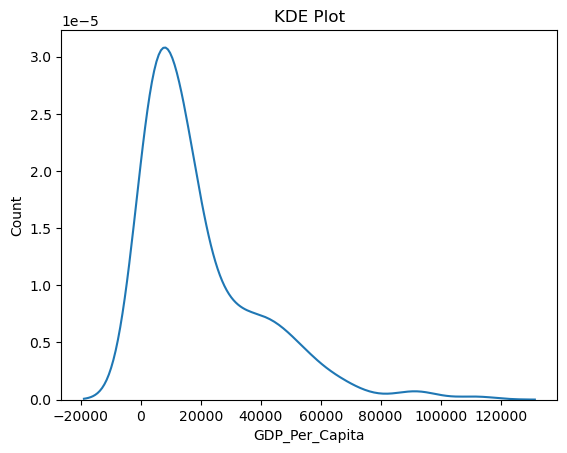

In [29]:
sns.kdeplot(year_2020['GDP_Per_Capita'])
plt.ylabel('Count')
plt.title('KDE Plot')

Text(0.5, 1.0, 'BoxPlot')

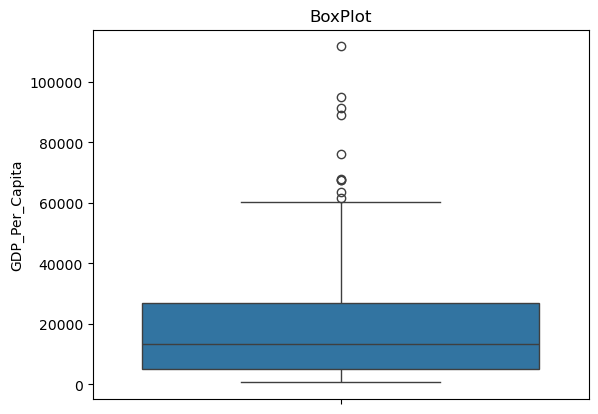

In [30]:
sns.boxplot(y=year_2020["GDP_Per_Capita"])
plt.title('BoxPlot')

Text(0.5, 1.0, 'Violin Plot')

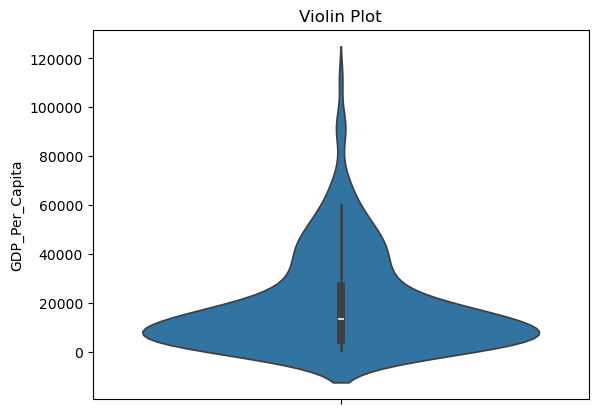

In [31]:
sns.violinplot(y=year_2020["GDP_Per_Capita"])
plt.title('Violin Plot')

## 9 What was the median GDP per capita value in 2020?


## Answer: 13357.997573370474

In [33]:
year_2020['GDP_Per_Capita'].median()

13357.997573370474

## 10 For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

A boxplot

A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)

A scatterplot

A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [35]:
gdp_decades=gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

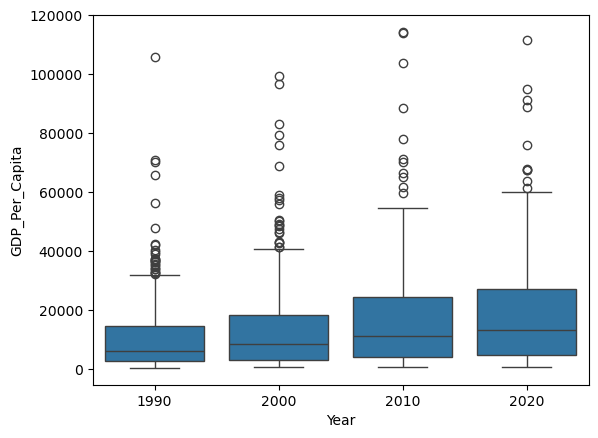

In [36]:
sns.boxplot(data=gdp_decades,
            x='Year',
            y='GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

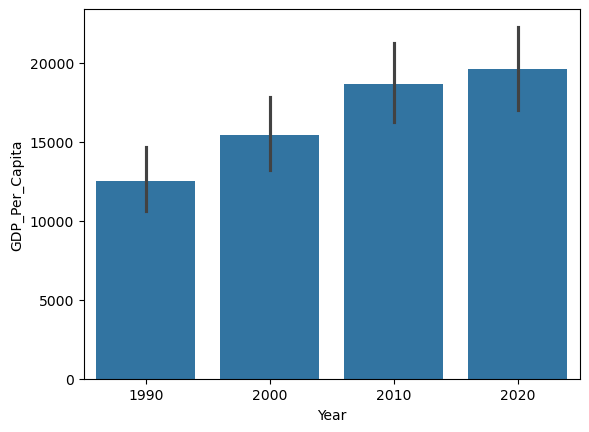

In [37]:
sns.barplot(data= gdp_decades,
            x='Year',
            y='GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

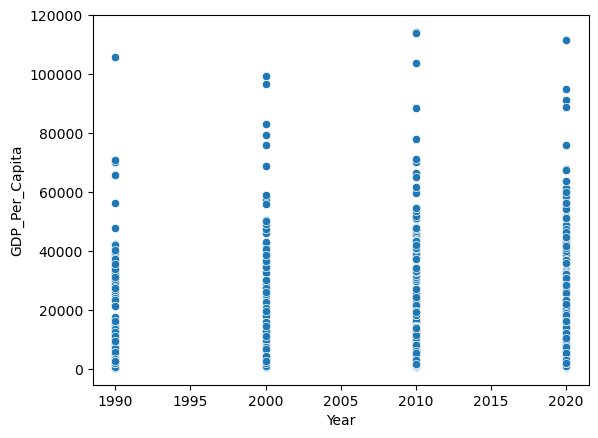

In [38]:
sns.scatterplot(data= gdp_decades,
            x='Year',
            y='GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

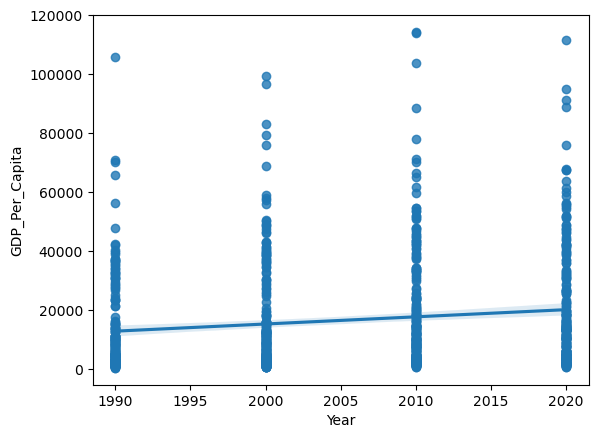

In [39]:
sns.regplot(data= gdp_decades,
            x='Year',
            y='GDP_Per_Capita')

## 11 Which country was the first to have a GDP per capita greater than $100,000?


## Answer: United Arab Emirates	1990	105893.626059

In [41]:
gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values('Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


## 12 Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [43]:
gdp_df[gdp_df['Year']==2020].nlargest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [44]:
top_country=gdp_df[gdp_df['Country']=='Luxembourg']

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

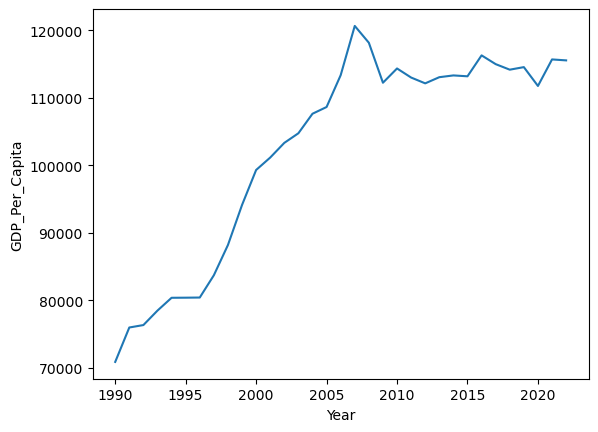

In [45]:
sns.lineplot(data= top_country,
            x='Year',
            y='GDP_Per_Capita')

## 13 Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [47]:
gdp_df[gdp_df['Year']==2020].nsmallest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [48]:
bottom_country=gdp_df[gdp_df['Country']=='Burundi']

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

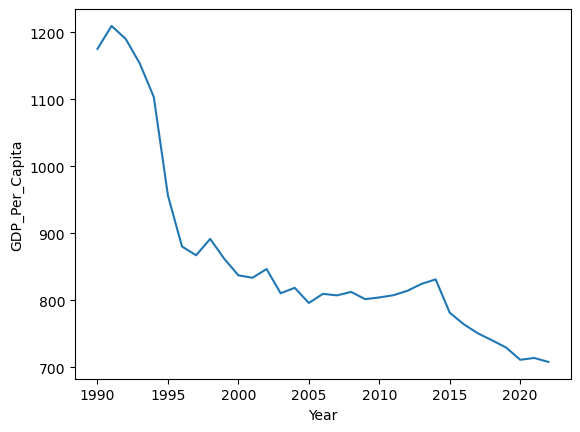

In [208]:
sns.lineplot(data=bottom_country,
        x='Year',
        y='GDP_Per_Capita')

## 14 Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [51]:
internet_df=pd.read_csv('../data/internet_use.csv', nrows=6083)

In [52]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


## 15 Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [54]:
internet_df=internet_df.drop(['Value Footnotes'], axis=1)

In [55]:
internet_df=internet_df.rename(columns={'Country or Area': 'Country',
                  'Value': 'Internet_Users_Pct'})

In [56]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


## 16 Look at the number of observations in this dataset per year. What do you notice?


## Answer: From 1991-1998 there was a significant drop off in observations

### internet_df.groupby("Year")["Country"].count                 --another way

In [58]:
internet_df['Year'].value_counts().reset_index().sort_values('Year')

,Year,count
0,1990,226
32,1991,39
31,1992,50
30,1993,66
29,1994,92
28,1995,141
26,1996,177
21,1997,188
20,1998,195
14,1999,207


In [59]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


## 17 What is the first year to have a non-zero internet users percentage value?


## Answer: Australia	1990	0.585095

In [221]:
internet_df[internet_df['Internet_Users_Pct']>0].nsmallest(10, 'Year').sort_values('Internet_Users_Pct')

,Country,Year,Internet_Users_Pct
543,Belgium,1990,0.001007
2829,Italy,1990,0.017545
2034,France,1990,0.052778
1570,Denmark,1990,0.097277
2796,Israel,1990,0.110774
2192,Germany,1990,0.125892
339,Austria,1990,0.130369
1010,Canada,1990,0.361000
2001,Finland,1990,0.401088
306,Australia,1990,0.585095


## 18 How does the distribution of internet users percent differ for 2000 and 2014?


## Answer: In 2014, the internet users significantly increased. 

In [63]:
distribution=internet_df[internet_df['Year'].isin([2000, 2014])]

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

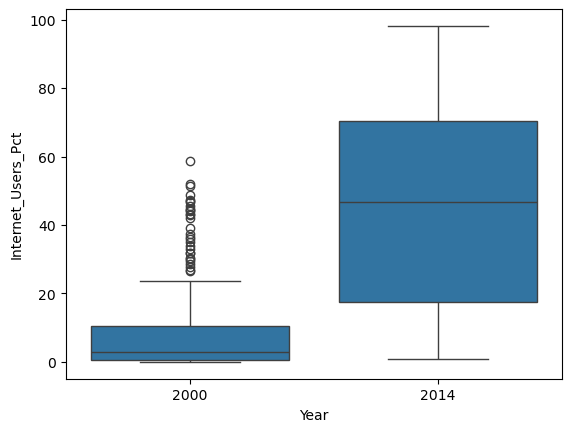

In [231]:
sns.boxplot(data=distribution,
           x='Year',
            y='Internet_Users_Pct')

## 19 For how many countries was the percentage of internet users below 5% in 2014?


## Answer: 10

### can do::     below_2014= internet_df['Year']==2014) & (internet_df['Internet_Users_Pct']<5)

In [66]:
internet_2014=internet_df[internet_df['Year']==2014]

In [67]:
internet_2014

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.0000
28,Albania,2014,54.3000
57,Algeria,2014,29.5000
87,Andorra,2014,86.1000
114,Angola,2014,21.3623
...,...,...,...
5937,Viet Nam,2014,41.0000
5960,Virgin Islands (US),2014,50.0700
6003,Yemen,2014,22.5500
6031,Zambia,2014,6.5000


In [68]:
internet_2014[internet_2014['Internet_Users_Pct']<5].count()

Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64

## 20 Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

### can also do::     gdp_and_internet_use=pd.merge(left=gdp_df, right=internet_df, how='outer')

In [70]:
gdp_and_internet_use=pd.merge(gdp_df, internet_df, how='outer')

In [71]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809
...,...,...,...,...
9107,Zimbabwe,2018,2399.621551,25.000000
9108,Zimbabwe,2019,2203.396810,26.588300
9109,Zimbabwe,2020,1990.319419,29.298600
9110,Zimbabwe,2021,2115.144555,32.461600


## 21 Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [73]:
largest_pct_2014=gdp_and_internet_use[gdp_and_internet_use['Year']==2014].nlargest(3, 'Internet_Users_Pct')

In [74]:
largest_pct_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3820,Iceland,2014,50450.741612,98.158
2780,Falkland (Malvinas) Islands,2014,NaN,97.600
794,Bermuda,2014,77361.104881,96.800


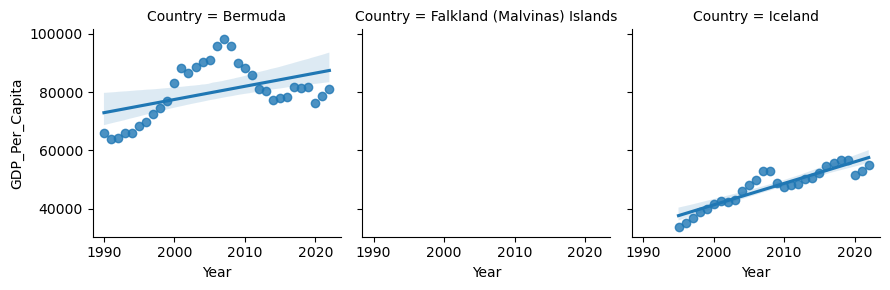

In [236]:
sns.FacetGrid(gdp_and_internet_use[gdp_and_internet_use["Country"].isin(largest_pct_2014['Country'])], col='Country').map(sns.regplot, 'Year', 'GDP_Per_Capita')

## 22 Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [77]:
gdp_and_internet_use_2014=gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

In [78]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2014,2144.449634,7.0000
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3000
145,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN
9011,World,2014,15120.730322,NaN
9039,Yemen,2014,NaN,22.5500
9070,Zambia,2014,3375.941270,6.5000


## 23 Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

## very nice graph from mike. need to remove NaN. import plotly.express as px

fig = px.scatter(
    gdp_and_internet_use_2014,
    x='GDP_Per_Capita',
    y='Internet_Users_Pct',
    size='GDP_Per_Capita',
    color='GDP_Per_Capita',
    hover_name='Country', 
    title="GDP vs Internet Users"
)

fig.update_layout(width=1000, height=600)

fig.show()

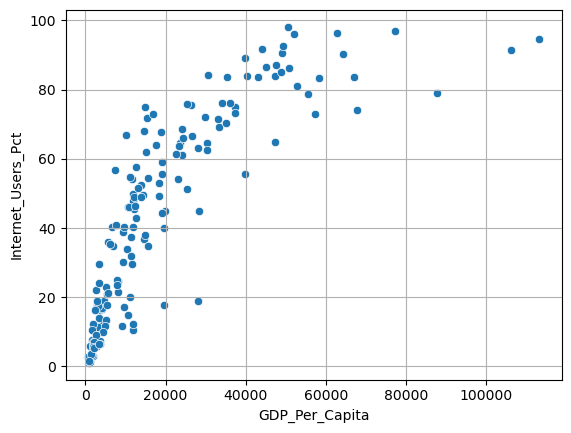

In [238]:
sns.scatterplot(data=gdp_and_internet_use_2014,
               x='GDP_Per_Capita',
               y='Internet_Users_Pct')
plt.grid(True)

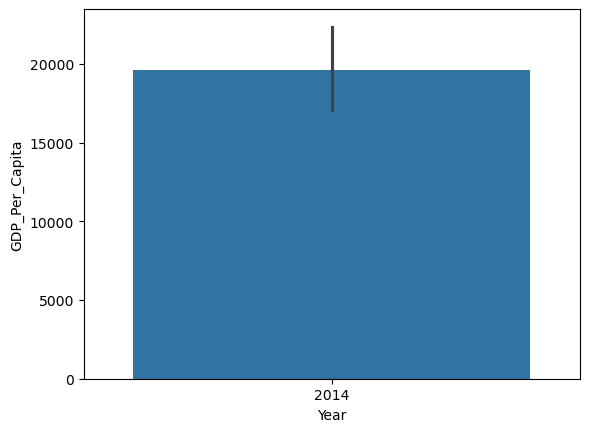

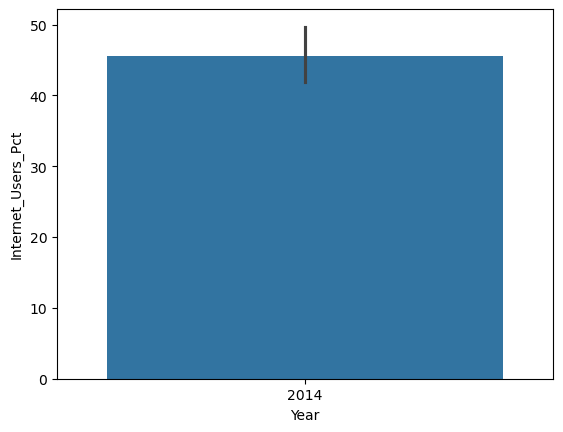

In [81]:
sns.barplot(data=gdp_and_internet_use_2014,
           x='Year',
           y='GDP_Per_Capita')
plt.show()

sns.barplot(data=gdp_and_internet_use_2014,
           x='Year',
           y='Internet_Users_Pct')
plt.show()

## 24 Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".



In [83]:
gdp_per_capita_2014=gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

In [84]:
qcut_column=pd.qcut(gdp_per_capita_2014["GDP_Per_Capita"], 3, labels=["Low", "Medium", "High"])

In [85]:
qcut_column

14         Low
46         Low
79         Low
112     Medium
145     Medium
         ...  
8978       Low
9011    Medium
9039       NaN
9070       Low
9103       Low
Name: GDP_Per_Capita, Length: 284, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [86]:
gdp_per_capita_2014.insert(4, 'GDP_group', qcut_column)

In [87]:
gdp_per_capita_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
14,Afghanistan,2014,2144.449634,7.0000,Low
46,Africa Eastern and Southern,2014,3642.875373,NaN,Low
79,Africa Western and Central,2014,4146.994622,NaN,Low
112,Albania,2014,11586.817446,54.3000,Medium
145,Algeria,2014,11561.259795,29.5000,Medium
...,...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN,Low
9011,World,2014,15120.730322,NaN,Medium
9039,Yemen,2014,NaN,22.5500,NaN
9070,Zambia,2014,3375.941270,6.5000,Low


## 25 Stretch Question: How does the median internet users percentage compare for the three gdp groups?

<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_group'>

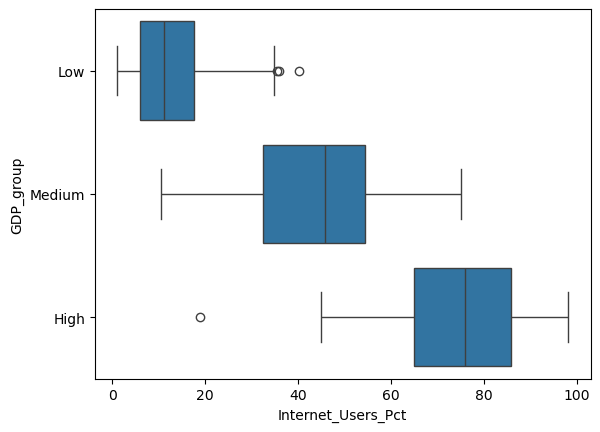

In [89]:
sns.boxplot(data=gdp_per_capita_2014,
           x='Internet_Users_Pct',
           y='GDP_group')

In [249]:
gdp_per_capita_2014.groupby('GDP_group')['Internet_Users_Pct'].median()

C:\Users\jswin\AppData\Local\Temp\ipykernel_28628\2374417387.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_per_capita_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


GDP_group
Low       11.0000
Medium    45.8752
High      75.9800
Name: Internet_Users_Pct, dtype: float64

## 26 Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.